In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Drop unnecessary columns
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# One-hot encode the categorical columns 'Geography' and 'Gender'
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Display the updated dataframe
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
columns_to_scale = ['Balance', 'EstimatedSalary', 'CreditScore','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Geography_Germany','Geography_Spain','Gender_Male']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the specified columns and update the dataframe
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the updated dataframe
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,1.0,0.0,1.0


<Axes: >

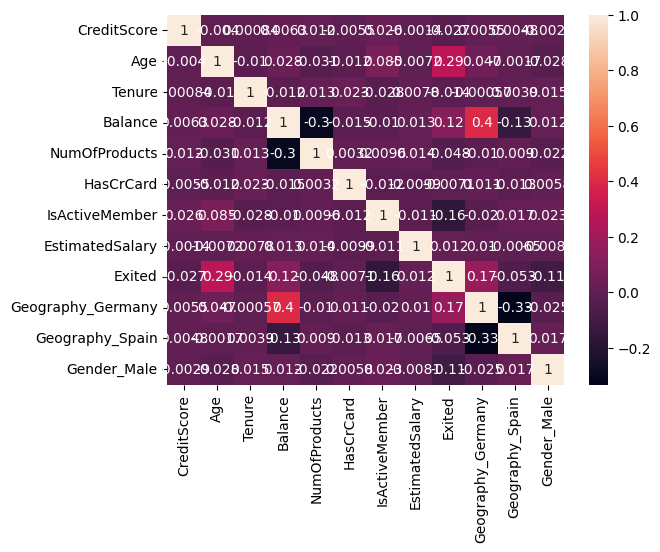

In [13]:
import seaborn as sns
corr=df.corr()
sns.heatmap(data=corr,annot=True)

In [14]:
# Extract the correlation values for the 'Exited' variable
exited_correlation = corr['Exited'].sort_values(ascending=False)

print(exited_correlation)


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


In [8]:
import tensorflow as tf

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [16]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,1.0,0.0,1.0


In [17]:
df['Exit']=df['Exited']
df.drop('Exited',axis=1,inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exit
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0,1
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0,0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0,0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0,1
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,1


In [30]:
X = df.iloc[:, :11]
y = df.iloc[:, 11]

In [31]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exit, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=40)

In [36]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

47/47 [==============================] - 0s 3ms/step


C:\Users\Gautam Raj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47/47 [==============================] - 0s 3ms/step


C:\Users\Gautam Raj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47/47 [==============================] - 0s 3ms/step


C:\Users\Gautam Raj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47/47 [==============================] - 0s 3ms/step


C:\Users\Gautam Raj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47/47 [==============================] - 0s 2ms/step


C:\Users\Gautam Raj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47/47 [==============================] - 0s 3ms/step


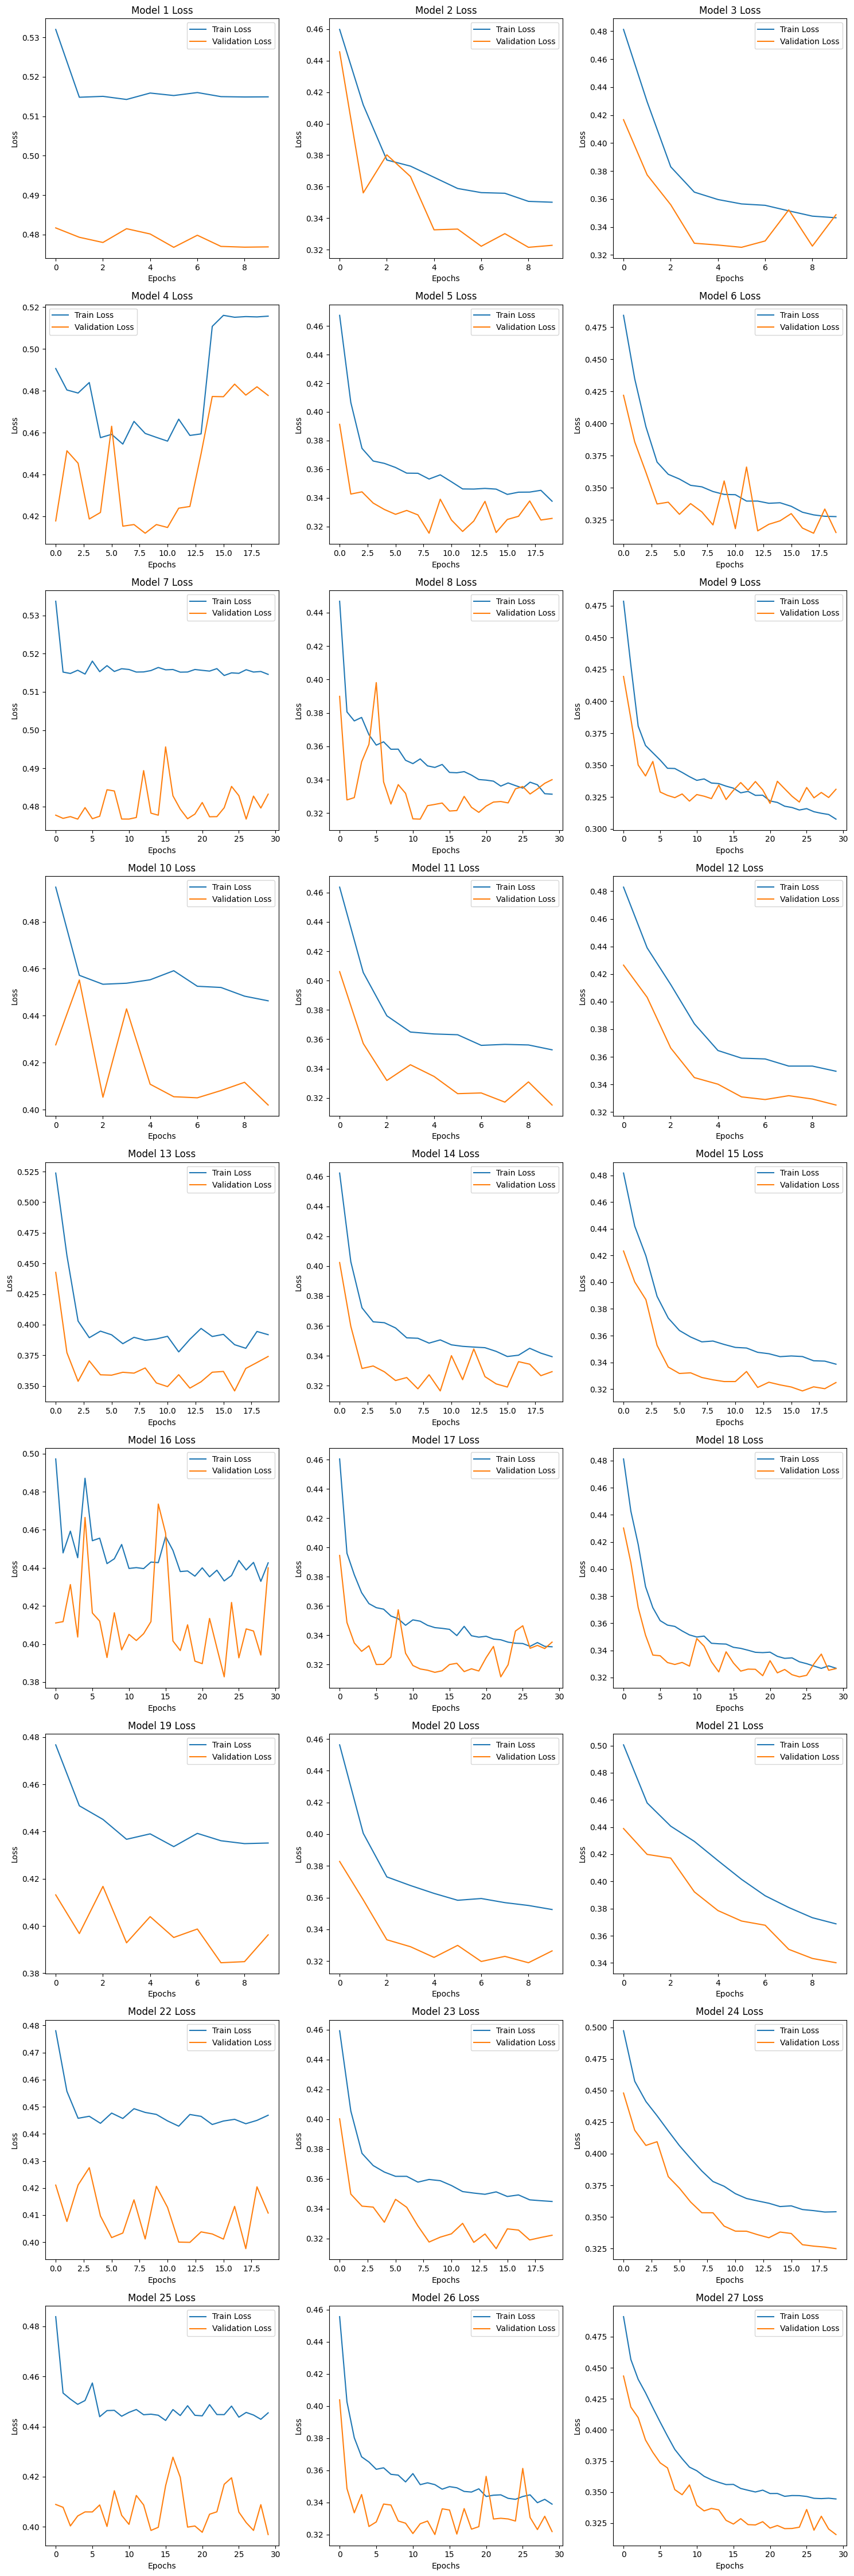

In [39]:
epochs =[10,20,30]
learning_rate =[0.1,0.01,0.001]
units_per_layer = [(128, 64, 32),(128,64,0),(128,0,0)]
# Initialize lists to store performance metrics
results = []

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
history_list=[]


for i in units_per_layer:
    for epoch in epochs:
        for lr in learning_rate:
            # Filter out zero units when building the model
            layers = [Input(shape=X_train.shape[1])]
            for units in i:
                if units > 0:  # Only add layers with positive units
                    layers.append(Dense(units, activation='relu'))
            layers.append(Dense(1, activation='sigmoid'))  # Output layer

            # Build the neural network model
            model = Sequential(layers)
            # Compile the model
            model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=["accuracy"])

            # Train the model
            batch_size = 32
            history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.15, verbose=0)
            history_list.append((history.history['loss'], history.history['val_loss']))
            
            # Predict and evaluate the model
            y_test_pred = model.predict(X_test)
            y_test_pred = (y_test_pred > 0.5).astype(int)
            accuracy = accuracy_score(y_test, y_test_pred)
            precision = precision_score(y_test, y_test_pred)
            recall = recall_score(y_test, y_test_pred)

            results.append([i, epoch, lr, accuracy, precision, recall])

# Create a grid of subplots for loss
num_plots = len(history_list)
cols = 3  # Number of columns in the subplot grid
rows = int(np.ceil(num_plots / cols))  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * rows))  # Adjust size based on number of rows

for idx, (loss, val_loss) in enumerate(history_list):
    plt.subplot(rows, cols, idx + 1)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Model {idx + 1} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [40]:
columns = ['Units per Layer', 'Epochs', 'Learning Rate', 'Accuracy', 'Precision', 'Recall']
results= pd.DataFrame(results, columns=columns)
results


,Units per Layer,Epochs,Learning Rate,Accuracy,Precision,Recall
0,"(128, 64, 32)",10,0.100,0.808000,0.000000,0.000000
1,"(128, 64, 32)",10,0.010,0.861333,0.675439,0.534722
2,"(128, 64, 32)",10,0.001,0.842000,0.590747,0.576389
3,"(128, 64, 32)",20,0.100,0.808000,0.000000,0.000000
4,"(128, 64, 32)",20,0.010,0.865333,0.699074,0.524306
5,"(128, 64, 32)",20,0.001,0.868000,0.725000,0.503472
6,"(128, 64, 32)",30,0.100,0.808000,0.000000,0.000000
7,"(128, 64, 32)",30,0.010,0.862667,0.679825,0.538194
8,"(128, 64, 32)",30,0.001,0.861333,0.678571,0.527778
9,"(128, 64, 0)",10,0.100,0.808000,0.000000,0.000000
